# Exploring Rewards and Loss Systems

There are 3 payout schemes that are implemented in each study, and this notebook intends to see if this is reflected in and/or has an influnce on the subjects' choices.

## Importing Relevant Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from functions import *

In [2]:
index_95 = pd.DataFrame(pd.read_csv('../data/index_95.csv'))
choice_95 = pd.DataFrame(pd.read_csv('../data/choice_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('../data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('../data/lo_95.csv'))

index_100 = pd.DataFrame(pd.read_csv('../data/index_100.csv'))
choice_100 = pd.DataFrame(pd.read_csv('../data/choice_100.csv'))
win_100 = pd.DataFrame(pd.read_csv('../data/wi_100.csv'))
loss_100 = pd.DataFrame(pd.read_csv('../data/lo_100.csv'))

index_150 = pd.DataFrame(pd.read_csv('../data/index_150.csv'))
choice_150 = pd.DataFrame(pd.read_csv('../data/choice_150.csv'))
win_150 = pd.DataFrame(pd.read_csv('../data/wi_150.csv'))
loss_150 = pd.DataFrame(pd.read_csv('../data/lo_150.csv'))

## Creating Separate Datasets per Study

In [3]:
## Payoff 1
study_fridberg = index_95
study_maia = index_100.iloc[181:221]
study_worthy = index_100.iloc[469:]

# Payoff 2
study_hortsmann = index_100.iloc[:162]
study_kjome = index_100.iloc[162:181]
study_steingrover_inprep = index_100.iloc[221:291]
study_premkumar = index_100.iloc[291:316]
study_steingrover_2011 = index_150.iloc[:57]
study_wetzels = index_150.iloc[57:]

# Payoff 3
study_wood = index_100.iloc[316:469]

In [4]:
## Payoff 1
choice_fridberg = choice_95
choice_maia = choice_100.iloc[181:221]
choice_worthy = choice_100.iloc[469:]

# Payoff 2
choice_hortsmann = choice_100.iloc[:162]
choice_kjome = choice_100.iloc[162:181]
choice_steingrover_inprep = choice_100.iloc[221:291]
choice_premkumar = choice_100.iloc[291:316]
choice_steingrover_2011 = choice_150.iloc[:57]
choice_wetzels = choice_150.iloc[57:]

# Payoff 3
choice_wood = choice_100.iloc[316:469]

In [5]:
# Payoff 1
win_fridberg = win_95
win_maia = win_100.iloc[181:221]
win_worthy = win_100.iloc[469:]

# Payoff 2
win_hortsmann = win_100.iloc[:162]
win_kjome = win_100.iloc[162:181]
win_steingrover_inprep = win_100.iloc[221:291]
win_premkumar = win_100.iloc[291:316]
win_steingrover_2011 = win_150.iloc[:57]
win_wetzels = win_150.iloc[57:]

# Payoff 3
win_wood = win_100.iloc[316:469]

In [6]:
# Payoff 1
loss_fridberg = loss_95
loss_maia = loss_100.iloc[181:221]
loss_worthy = loss_100.iloc[469:]

# Payoff 2
loss_hortsmann = loss_100.iloc[:162]
loss_kjome = loss_100.iloc[162:181]
loss_steingrover_inprep = loss_100.iloc[221:291]
loss_premkumar = loss_100.iloc[291:316]
loss_steingrover_2011 = loss_150.iloc[:57]
loss_wetzels = loss_150.iloc[57:]

# Payoff 3
loss_wood = loss_100.iloc[316:469]

## Deeper Analysis of the Risk/Reward Associated with each Choice and Study

In [7]:
## Payoff 1

times_1_chosen = 0
times_1_loss = 0
losses_1 = []
times_1_win = 0
wins_1 = []

times_2_chosen = 0
times_2_loss = 0
losses_2 = []
times_2_win = 0
wins_2 = []

times_3_chosen = 0
times_3_loss = 0
losses_3 = []
times_3_win = 0
wins_3 = []

times_4_chosen = 0
times_4_loss = 0
losses_4 = []
times_4_win = 0
wins_4 = []


for choice_win_loss_dataset in [[choice_fridberg, win_fridberg, loss_fridberg],
                          [choice_maia, win_maia, loss_maia],
                          [choice_worthy, win_worthy, win_worthy]]:
    choice_df = choice_win_loss_dataset[0]
    win_df = choice_win_loss_dataset[1]
    loss_df = choice_win_loss_dataset[2]
    num_subjects = len(choice_df.iloc[:,0])
    num_trials = len(choice_df.iloc[0])
    for subject in range(0,num_subjects):
        for round in range(0,num_trials):
            choice_made = choice_df.iloc[subject][round]
            if choice_made == 1:
                times_1_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_1_loss +=1
                    losses_1.append(loss)
                if win > 0:
                    times_1_win += 1
                    wins_1.append(win)
            elif choice_made == 2:
                times_2_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_2_loss +=1
                    losses_2.append(loss)
                if win > 0:
                    times_2_win += 1
                    wins_2.append(win)
            elif choice_made == 3:
                times_3_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_3_loss +=1
                    losses_3.append(loss)
                if win > 0:
                    times_3_win += 1
                    wins_3.append(win)
            elif choice_made == 4:
                times_4_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_4_loss +=1
                    losses_4.append(loss)
                if win > 0:
                    times_4_win += 1
                    wins_4.append(win)

print("Times 1 was chosen=", times_1_chosen)
print("Times 1 was a loss=", times_1_loss)
print("Times 1 was a win=", times_1_win)
print("Average amount lost when choosing 1= ", str(sum(losses_1)/times_1_chosen))
print("Average amount won when choosing 1= ", str(sum(wins_1)/times_1_chosen))

print("Times 2 was chosen=", times_2_chosen)
print("Times 2 was a loss=", times_2_loss)
print("Times 2 was a win=", times_2_win)
print("Average amount lost when choosing 2= ", str(sum(losses_2)/times_2_chosen))
print("Average amount won when choosing 2= ", str(sum(wins_2)/times_2_chosen))

print("Times 3 was chosen=", times_3_chosen)
print("Times 3 was a loss=", times_3_loss)
print("Times 3 was a win=", times_3_win)
print("Average amount lost when choosing 3= ", str(sum(losses_3)/times_3_chosen))
print("Average amount won when choosing 3= ", str(sum(wins_3)/times_3_chosen))

print("Times 4 was chosen=", times_4_chosen)
print("Times 4 was a loss=", times_4_loss)
print("Times 4 was a win=", times_4_win)
print("Average amount lost when choosing 4= ", str(sum(losses_4)/times_4_chosen))
print("Average amount won when choosing 4= ", str(sum(wins_4)/times_4_chosen))

Times 1 was chosen= 1400
Times 1 was a loss= 383
Times 1 was a win= 1400
Average amount lost when choosing 1=  -69.32142857142857
Average amount won when choosing 1=  100.0
Times 2 was chosen= 2516
Times 2 was a loss= 153
Times 2 was a win= 2516
Average amount lost when choosing 2=  -76.01351351351352
Average amount won when choosing 2=  100.0
Times 3 was chosen= 2232
Times 3 was a loss= 694
Times 3 was a win= 2232
Average amount lost when choosing 3=  -15.367383512544803
Average amount won when choosing 3=  50.0
Times 4 was chosen= 2777
Times 4 was a loss= 169
Times 4 was a win= 2777
Average amount lost when choosing 4=  -15.214259992797983
Average amount won when choosing 4=  50.0


In [8]:
## Payoff 2

times_1_chosen = 0
times_1_loss = 0
losses_1 = []
times_1_win = 0
wins_1 = []

times_2_chosen = 0
times_2_loss = 0
losses_2 = []
times_2_win = 0
wins_2 = []

times_3_chosen = 0
times_3_loss = 0
losses_3 = []
times_3_win = 0
wins_3 = []

times_4_chosen = 0
times_4_loss = 0
losses_4 = []
times_4_win = 0
wins_4 = [] 

for choice_win_loss_dataset in [[choice_hortsmann, win_hortsmann, loss_hortsmann],
                          [choice_kjome, win_kjome, loss_kjome],
                          [choice_steingrover_inprep, win_steingrover_inprep, win_steingrover_inprep],
                          [choice_premkumar, win_premkumar, loss_premkumar],
                          [choice_steingrover_2011, win_steingrover_2011, win_steingrover_2011],
                          [choice_wetzels, win_wetzels, loss_wetzels],]:
    choice_df = choice_win_loss_dataset[0]
    win_df = choice_win_loss_dataset[1]
    loss_df = choice_win_loss_dataset[2]
    num_subjects = len(choice_df.iloc[:,0])
    num_trials = len(choice_df.iloc[0])
    for subject in range(0,num_subjects):
        for round in range(0,num_trials):
            choice_made = choice_df.iloc[subject][round]
            if choice_made == 1:
                times_1_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_1_loss +=1
                    losses_1.append(loss)
                if win > 0:
                    times_1_win += 1
                    wins_1.append(win)
            elif choice_made == 2:
                times_2_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_2_loss +=1
                    losses_2.append(loss)
                if win > 0:
                    times_2_win += 1
                    wins_2.append(win)
            elif choice_made == 3:
                times_3_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_3_loss +=1
                    losses_3.append(loss)
                if win > 0:
                    times_3_win += 1
                    wins_3.append(win)
            elif choice_made == 4:
                times_4_chosen += 1
                loss = loss_df.iloc[subject][round]
                win = win_df.iloc[subject][round]
                if loss < 0:
                    times_4_loss +=1
                    losses_4.append(loss)
                if win > 0:
                    times_4_win += 1
                    wins_4.append(win)

print("Times 1 was chosen=", times_1_chosen)
print("Times 1 was a loss=", times_1_loss)
print("Times 1 was a win=", times_1_win)
print("Average amount lost when choosing 1= ", str(sum(losses_1)/times_1_chosen))
print("Average amount won when choosing 1= ", str(sum(wins_1)/times_1_chosen))

print("Times 2 was chosen=", times_2_chosen)
print("Times 2 was a loss=", times_2_loss)
print("Times 2 was a win=", times_2_win)
print("Average amount lost when choosing 2= ", str(sum(losses_2)/times_2_chosen))
print("Average amount won when choosing 2= ", str(sum(wins_2)/times_2_chosen))

print("Times 3 was chosen=", times_3_chosen)
print("Times 3 was a loss=", times_3_loss)
print("Times 3 was a win=", times_3_win)
print("Average amount lost when choosing 3= ", str(sum(losses_3)/times_3_chosen))
print("Average amount won when choosing 3= ", str(sum(wins_3)/times_3_chosen))

print("Times 4 was chosen=", times_4_chosen)
print("Times 4 was a loss=", times_4_loss)
print("Times 4 was a win=", times_4_win)
print("Average amount lost when choosing 4= ", str(sum(losses_4)/times_4_chosen))
print("Average amount won when choosing 4= ", str(sum(wins_4)/times_4_chosen))

Times 1 was chosen= 5793
Times 1 was a loss= 2039
Times 1 was a win= 5793
Average amount lost when choosing 1=  -88.14949076471603
Average amount won when choosing 1=  100.62316588986708
Times 2 was chosen= 13683
Times 2 was a loss= 851
Times 2 was a win= 13683
Average amount lost when choosing 2=  -79.9714974786231
Average amount won when choosing 2=  100.71548636994811
Times 3 was chosen= 10485
Times 3 was a loss= 3182
Times 3 was a win= 10485
Average amount lost when choosing 3=  -14.82832618025751
Average amount won when choosing 3=  50.59418216499762
Times 4 was chosen= 12339
Times 4 was a loss= 825
Times 4 was a win= 12339
Average amount lost when choosing 4=  -17.240051868060622
Average amount won when choosing 4=  51.030472485614716


In [9]:
## Payoff 3

times_1_chosen = 0
times_1_loss = 0
losses_1 = []
times_1_win = 0
wins_1 = []

times_2_chosen = 0
times_2_loss = 0
losses_2 = []
times_2_win = 0
wins_2 = []

times_3_chosen = 0
times_3_loss = 0
losses_3 = []
times_3_win = 0
wins_3 = []

times_4_chosen = 0
times_4_loss = 0
losses_4 = []
times_4_win = 0
wins_4 = []

choice_df = choice_wood
win_df = win_wood
loss_df = loss_wood
num_subjects = len(choice_df.iloc[:,0])
num_trials = len(choice_df.iloc[0])
for subject in range(0,num_subjects):
    for round in range(0,num_trials):
        choice_made = choice_df.iloc[subject][round]
        if choice_made == 1:
            times_1_chosen += 1
            loss = loss_df.iloc[subject][round]
            win = win_df.iloc[subject][round]
            if loss < 0:
                times_1_loss +=1
                losses_1.append(loss)
            if win > 0:
                times_1_win += 1
                wins_1.append(win)
        elif choice_made == 2:
            times_2_chosen += 1
            loss = loss_df.iloc[subject][round]
            win = win_df.iloc[subject][round]
            if loss < 0:
                times_2_loss +=1
                losses_2.append(loss)
            if win > 0:
                times_2_win += 1
                wins_2.append(win)
        elif choice_made == 3:
            times_3_chosen += 1
            loss = loss_df.iloc[subject][round]
            win = win_df.iloc[subject][round]
            if loss < 0:
                times_3_loss +=1
                losses_3.append(loss)
            if win > 0:
                times_3_win += 1
                wins_3.append(win)
        elif choice_made == 4:
            times_4_chosen += 1
            loss = loss_df.iloc[subject][round]
            win = win_df.iloc[subject][round]
            if loss < 0:
                times_4_loss +=1
                losses_4.append(loss)
            if win > 0:
                times_4_win += 1
                wins_4.append(win)

print("Times 1 was chosen=", times_1_chosen)
print("Times 1 was a loss=", times_1_loss)
print("Times 1 was a win=", times_1_win)
print("Average amount lost when choosing 1= ", str(sum(losses_1)/times_1_chosen))
print("Average amount won when choosing 1= ", str(sum(wins_1)/times_1_chosen))

print("Times 2 was chosen=", times_2_chosen)
print("Times 2 was a loss=", times_2_loss)
print("Times 2 was a win=", times_2_win)
print("Average amount lost when choosing 2= ", str(sum(losses_2)/times_2_chosen))
print("Average amount won when choosing 2= ", str(sum(wins_2)/times_2_chosen))

print("Times 3 was chosen=", times_3_chosen)
print("Times 3 was a loss=", times_3_loss)
print("Times 3 was a win=", times_3_win)
print("Average amount lost when choosing 3= ", str(sum(losses_3)/times_3_chosen))
print("Average amount won when choosing 3= ", str(sum(wins_3)/times_3_chosen))

print("Times 4 was chosen=", times_4_chosen)
print("Times 4 was a loss=", times_4_loss)
print("Times 4 was a win=", times_4_win)
print("Average amount lost when choosing 4= ", str(sum(losses_4)/times_4_chosen))
print("Average amount won when choosing 4= ", str(sum(wins_4)/times_4_chosen))


Times 1 was chosen= 2564
Times 1 was a loss= 1402
Times 1 was a win= 2564
Average amount lost when choosing 1=  -138.59204368174727
Average amount won when choosing 1=  104.9804992199688
Times 2 was chosen= 4402
Times 2 was a loss= 490
Times 2 was a win= 4402
Average amount lost when choosing 2=  -174.6365288505225
Average amount won when choosing 2=  111.7014993184916
Times 3 was chosen= 3523
Times 3 was a loss= 2029
Times 3 was a win= 3523
Average amount lost when choosing 3=  -26.078626170877094
Average amount won when choosing 3=  54.53306840760715
Times 4 was chosen= 4811
Times 4 was a loss= 458
Times 4 was a win= 4811
Average amount lost when choosing 4=  -27.03699854500104
Average amount won when choosing 4=  56.877987944294325


## Creating graphs to see differences

### Risk of a Penalty per choice per Payoff Scheme

In [10]:
# Risk of loss per choice per study

payoff1_risk = [383/1400,
               153/2516,
               694/2232,
               169/2777]
payoff2_risk = [2039/5793,
               851/13683,
               3182/10485,
               825/12339]
payoff3_risk = [1402/2564,
               490/4402,
               2029/3523,
               458/4811]
labels = [1, 2, 3, 4]

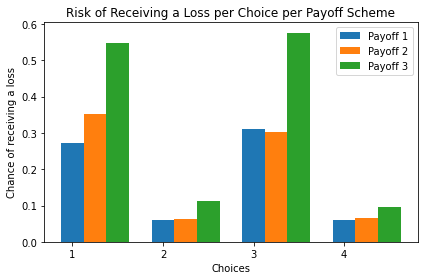

In [11]:
fig, ax = plt.subplots()
x = np.arange(len(labels))  # the label locations
width = 0.25

rects1 = ax.bar(x, payoff1_risk, width, label='Payoff 1')
rects2 = ax.bar(x +.25, payoff2_risk, width, label='Payoff 2')
rects2 = ax.bar(x + .5, payoff3_risk, width, label='Payoff 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Chance of receiving a loss')
ax.set_xlabel('Choices')
ax.set_title('Risk of Receiving a Loss per Choice per Payoff Scheme')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

As shown in the above graph and indicated in [this paper](https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ak/), the decks 1 and 3 have more frequent penalties for its subjects. All three payoff schemes seem to be very similar.

In payoff scheme 1, deck 3 holds a higher penalty risk than deck 1, although from the graph we can see that for payoff scheme 2, it is riskier to choose from 1. This could explain why decks 1 and 3 are chosen the least amount of times, even though deck 3 is considered a 'good deck'

### Average Penalty Received per Choice per Payoff Scheme

In [12]:
# Average penalty per choice per study

payoff1_avg_penalty = [-69.32142857142857,
                      -76.01351351351352,
                      -15.367383512544803,
                      -15.214259992797983]
payoff2_avg_penalty = [-88.14949076471603,
               -79.9714974786231,
               -14.82832618025751,
               -17.240051868060622]
payoff3_avg_penalty = [-138.59204368174727,
               -174.6365288505225,
               -26.078626170877094,
               -27.03699854500104]
labels = [1, 2, 3, 4]

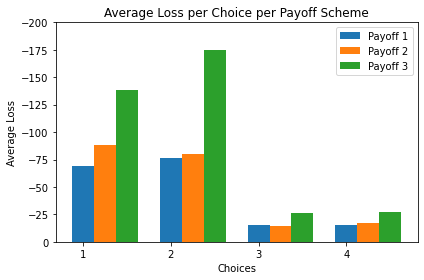

In [13]:
fig, ax = plt.subplots()
x = np.arange(len(labels))  # the label locations
width = 0.25

rects1 = ax.bar(x, payoff1_avg_penalty, width, label='Payoff 1')
rects2 = ax.bar(x +.25, payoff2_avg_penalty, width, label='Payoff 2')
rects2 = ax.bar(x + .5, payoff3_avg_penalty, width, label='Payoff 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Loss')
ax.set_xlabel('Choices')
ax.set_title('Average Loss per Choice per Payoff Scheme')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, -200)
ax.legend()

fig.tight_layout()

plt.show()

### Average Reward Received per Choice per Payoff Scheme

In [14]:
# Average reward per choice per study

payoff1_avg_reward = [100,
                      100,
                      50,
                      50]
payoff2_avg_reward = [100.62316588986708,
               100.71548636994811,
               50.59418216499762,
               51.030472485614716]
payoff3_avg_reward = [104.9804992199688,
               111.7014993184916,
               54.53306840760715,
               56.877987944294325]
labels = [1, 2, 3, 4]

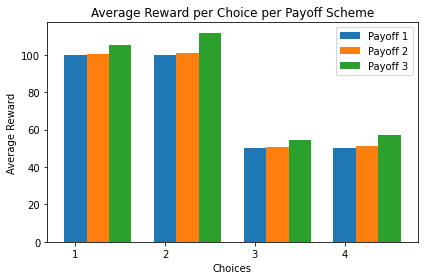

In [15]:
fig, ax = plt.subplots()
x = np.arange(len(labels))  # the label locations
width = 0.25

rects1 = ax.bar(x, payoff1_avg_reward, width, label='Payoff 1')
rects2 = ax.bar(x +.25, payoff2_avg_reward, width, label='Payoff 2')
rects2 = ax.bar(x + .5, payoff3_avg_reward, width, label='Payoff 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Reward')
ax.set_xlabel('Choices')
ax.set_title('Average Reward per Choice per Payoff Scheme')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

It's clear that there is not much deviation between the reward values for each payoff scheme. Payoff Scheme 3 seems to offer the largest reward by a small margin.